# Estimating errors between two trajectories

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import validator as validator
import doctest


## Useful functions
### How to test a solution?

In [2]:
def solution(X, Y):
    return np.abs(np.trapz(*X.transpose()[::-1]) - np.trapz(*Y.transpose()[::-1]))

In [3]:
np.loadtxt("test/[test0]simple.txt", skiprows=0, max_rows=2, unpack=True, delimiter=',')

array([[0., 0.],
       [1., 0.],
       [2., 1.],
       [3., 1.],
       [4., 0.]])

In [4]:
validator.test(solution, display = False, samples_range = slice(0, 5))

SR1.txt	2.6 0.001
Hello
NOT ok 	 The expected value is 2.6, but the output value is 13.0.

SR2.txt	1.6 0.001
Hello
NOT ok 	 The expected value is 1.6, but the output value is 8.0.

SR3.txt	0.447 0.001
Hello
NOT ok 	 The expected value is 0.447, but the output value is 1.0.

SR4.txt	0.83 0.001
Hello
NOT ok 	 The expected value is 0.83, but the output value is 2.0.

SR5.txt	1.208 0.01
Hello
NOT ok 	 The expected value is 1.208, but the output value is 1.0.



False

### Distance between two points

In [5]:
def dist(P, Q):
    """
    >>> dist(*np.array([[-8, 9],[0, 0]]))
    12.041594578792296
    >>> dist(np.array([10, 20]), np.array([-4, 5]))
    20.518284528683193
    >>> dist(np.array([-3, 5]), np.array([-3, 5]))
    0.0
    """
    return np.sqrt(np.sum((P-Q)**2 ))

def dist_to_line(A1, A2, B):
    """ distance from B to line (A1A2)"""
    # equation of the line (A1A2) is defined as by = ax + c
    b, a = A2 - A1
    c = b*A1[1] - a*A1[0]
    return abs(b*B[1] - a*B[0] - c)/np.hypot(a, b)

# def slope(A, B):
#     """ returns slope of the line (AB) """
#     return (B[1] - A[1]) / (B[0] - A[0])

def orientation(A, B, C):
    """ Return 1 if Counterclockwise (and colinear)??, -1 if clockwise """
    r = (B[1] - A[1]) * (C[0] - B[0]) - (C[1] - B[1]) * (B[0] - A[0])
    if np.abs(r) < 1e-5 : # r = 0
        return 0
    elif r > 0:
        return 1
    else:
        return -1
    
if __name__ == "__main__":
    doctest.testmod()

### Finding the intersection point of two line segments
Let $p_1$ and $p_2$ be the (2D) endpoints of one segment and let $q_1$ and $q_2$ be the endpoints of the other. A parametrization of these lines are defined as:
$$
\left\{\begin{array}{l}{p_{1}+t_p\left(p_{2}-p_{1}\right)} \\ {p_{3}+t_q\left(p_{4}-p_{3}\right)}\end{array}\right.
$$
where $t_p, t_q \in [0,1]$. Thus, the segments intersect iff there exists $(s,t)$ such that:
$$p_1+t_p(p_2-p_1) = q_1+t_q(q_2-q_1)$$
i.e.
$$t_q(q_2-q_1) + t_p(p_1-p_2) = p_1 - q_1$$
We can define our system using matrices ($p_1$, $p_2$, $q_1$, $q_2$ being a column vector of size 2) :
$$
\underbrace{\left[
    \begin{array}{ll}
        q_2-q_1 & p_1-p_1\end{array}
\right]}_A \times 
\underbrace{\left[
    \begin{array}{l}
        t_q \\ t_p\end{array}
\right]}_T = 
\underbrace{\left[
    \begin{array}{ll}
        p_1 & q_1\end{array}
\right]}_B
$$
* if a solution $(t_p, t_q)$ exists and is in $[0,1]\times[0,1]$, the segments intersect (at $p_{1}+t_p(p_{2}-p_{1})$).
* if A is not inversible, the segments have the same slope (we need to test if segments are colinear or parallel)

In [6]:
def find_intersection_seg(p1, p2, q1, q2, display = False):
    """ Find intersection point between [p1, p2] and [q1, q2] 
    Parameters :
        - p1, p2, q1, q2 : np.ndarrays of shape (2,)
    Returns : the coordinates of the intersection points,  
        if the line segments intersect
    
    [TODO] Manage the case where the matrix is singular
    
    >>> find_intersection_seg(*np.array([[10, 5], [8, 1], [3,7],[0,1]]))
    array([inf, inf])
    """
    
    
    
    a = np.array([q2-q1, p1-p2]).transpose()
    if display:
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], '-o')
        plt.plot([q1[0], q2[0]], [q1[1], q2[1]], '-o')
    if np.linalg.det(a): # if a is invertible (if lines intersect)
        b = p1 - q1
        t = np.linalg.solve(a,b)
        if np.all(0 < t) and np.all(t < 1): # segments intersect
            intersection = p1 + t[1]*(p2-p1)
            if display:
                plt.plot(*(intersection), 'o')
            return intersection 
    return np.array([np.inf, np.inf])

if __name__=="__main__":
        doctest.testmod()

### Finding the intersection point of two lines

In [7]:
def norm(X):
    return (np.sum(X*X))**(0.5)

def is_colinear(v1, v2):
    return abs(np.dot(v1, v2)) == norm(v1) * norm(v2)

def find_eq_line(A, B):
    """ax + by = c"""
    a = B[1] - A[1]
    b = A[0] - B[0]
    c = b*A[1] + a*A[0]
    return a, b, c

def find_intersection_lines(p1, p2, q1, q2):
    a1, b1, c1 = find_eq_line(p1, p2)
    a2, b2, c2 = find_eq_line(q1, q2)
    denom = a1*b2 - a2*b1
    xs = (c1*b2 - c2*b1) / denom if denom else np.inf
    ys = (a1*c2 - a2*c1) / denom if denom else np.inf
    return np.array([xs, ys])

def find_intersection_line_seg(p1, p2, q1, q2):
    """intersection between (p1, p2) and ]q1, q2["""
    s = find_intersection_lines(p1, p2, q1, q2)
    # we have two find whether or not s belongs to ]q1, q2]
    ks = np.dot(q2-q1, s-q1)
    kp = np.dot(q2-q1, q2-q1)
    if 0 < ks < kp:
        return s
    elif ks >= kp:
        return np.inf
    else: # ks <= 0
        return -np.inf

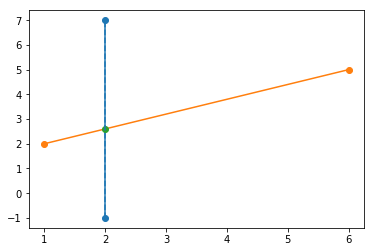

In [8]:
# Testing fing_intersection_line_seg
set = np.array([[2, 7], [2,-1], [6,5], [1,2]])
plt.plot(set[:2,0], set[:2,1], '-o')
plt.plot(set[2:,0], set[2:,1], '-o')
plt.plot(*find_intersection_line_seg(*set), 'o')
a, b, c = find_eq_line(*set[:2])
if b:
    x = np.linspace(np.min(set, axis = 0)[0], np.max(set, axis = 0)[0], 200)
    plt.plot(x, (c - a*x)/b, 'C0--')
else:
    plt.plot([c/a, c/a], [np.min(set, axis = 0)[1], np.max(set, axis = 0)[1]], 'C0--')

### Suite ..

In [9]:
# coder intersections

---
## Solution 1 - Bases triangulaires

In [10]:
# T # trajectory , two colums matrix 
# P # path follown, two colums matrix

#lgT=len(T), lgP=len(P),depMin=min (T[0][0], P[0][0]),endMin=min (T[lgT][0], P[LgP][0])


# interval  of  computing is [depmin, endMin]

# determination of the intervall lenght for calculation

def lengI(T,P):
    d1=0
    d2=0
    for i in range (len(P[:, 0])+1):
        if len(P[:, 0])>d1:
            d1=P[:, 0][i]
    for i in range (len(T[:, 0])+1):
        if T[:, 0][i]>d2:
            d2=T[:, 0][i]
    return min (d1,d2)
T=np.array([[0,0],[1,0],[2,1],[3,1],[4,0]])
P=np.array([[0,3],[1,3],[2,2],[3,2],[4,5]])

lengI(T,P)


IndexError: index 5 is out of bounds for axis 0 with size 5

In [11]:
T=np.array([[0,0],[1,0],[2,1],[3,1],[4,0]])
P=np.array([[0,3],[1,3],[2,2],[3,2],[4,5]])
len(P[:, 0])
d1=0
for i in range len(P[:, 0]):
        if P[:, 0][i]>d1:
            d1=P[:, 0][i]



SyntaxError: invalid syntax (<ipython-input-11-b0f2daa9d8ba>, line 5)

---
## Solution 2 - Pivots

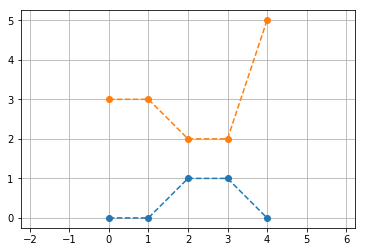

In [12]:
from matplotlib.patches import Polygon
from matplotlib.ticker import MaxNLocator

testname = "test/[test0]simple.txt"
X = np.loadtxt(testname, skiprows=0, max_rows=2, unpack=True, delimiter=',')
Y = np.loadtxt(testname, skiprows=2, max_rows=2, unpack=True, delimiter=',')

plt.figure()
plt.plot(*X.transpose(), '--o', *Y.transpose(), '--o')
plt.axis("equal")
plt.grid()
plt.show()

In [13]:
def find_next_focus_point1(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to the two current points (p1 or q1)
    Returns: True if p2 is the next focus point, False if q2
    """
    return min(dist(p2, p1), dist(p2, q1)) < min(dist(q2, p1), dist(q2, q1)) #p2 is the closest point

def find_next_focus_point2(p1, p2, q1, q2):
    """
    The closest point (p2 or q2) to its respective point (p1 or q1)
    """
    return dist(p2, p1) < dist(q2, q1) #p2 is the closest point
    
def find_next_focus_point3(p1, p2, q1, q2):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)


def find_next_focus_point4(p1, p2, q1, q2, oldpoint):
    """
    distance between p2 (or q1) and the line (p1q1) 
    """
    wrong_side = orientation(p1, q1, oldpoint)
    if orientation(p1, q1, p2) == wrong_side:
        return False
    elif orientation(p1, q1, q2) == wrong_side:
        return True
    else:
        return dist_to_line(*(p1, q1), p2) < dist_to_line(*(p1, q1), q2)

In [14]:
NTRIANGLE = 0
def triangle_area(A, B, C, ax):
    global NTRIANGLE
    NTRIANGLE += 1
    ax.add_patch(Polygon([A, B, C], facecolor=["grey", "lightgrey"][NTRIANGLE % 2], ec = "black", alpha = 0.3))
    return 0.5 * abs((B[0]-A[0])*(C[1]-A[1]) - (C[0]-A[0])*(B[1]-A[1]))

We are defining `si` and `tj` instead of simply using `S[i]` and `T[j]`, in order to be capable of redefining these points in the case of intersection.

In [24]:
def error_btw_trajectories(S, T):
    i, j = 0, 0 # i (or j) is the index of the current point along S (or T)
    si, tj = S[i], T[j]
    plt.figure()
    plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
    ax = plt.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid()
    error, old_point, dir_point = 0, si, (si + tj) / 2
    while i < len(S) - 1 and j < len(T) - 1:
#         plt.show()
#         plt.figure()
#         plt.plot(*S.transpose(), '-o', *T.transpose(), '-o')
#         ax = plt.gca()
#         ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#         ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        plt.grid()
#         print(i, j, si, S[i+1], tj, T[j+1])
        # 1. Check whether or not there is an intersection between the two next segments
        intersect = find_intersection_seg(si, S[i+1], tj, T[j+1])
        if np.all(intersect != np.inf): # if the segments [S_i, S_i+1] and [T_i, T_i+1] intersect
#             print(">> Intersection")
            # Compute area of the triangle intersect, si, tj
            error += triangle_area(si, tj, intersect, ax)
            plt.plot(*intersect, 'og')
            if find_next_focus_point3(si, S[i+1], tj, T[j+1]):
                old_point = si
                dir_point = (si + tj)/2 # TODO : is this a good idea ??????????
                si, i = S[i+1], i+1
                tj = intersect
            else:
                old_point = tj
                dir_point = (si + tj)/2 # TODO : is this a good idea ??????????
                tj, j = T[j+1], j+1
                si = intersect
        # If there is no intersection, we have to check the orientation of the two next points
        else:
            orientation_s, orientation_t = orientation(si, tj, S[i+1]), orientation(si, tj, T[j+1])
#             print("orientation", orientation_s, orientation_t)
            if orientation_s == 0 and orientation_t == 0:
#                 print("Strange ...")
                if find_next_focus_point3(si, S[i+1], tj, T[j+1]):
                    old_point, dir_point = si, si
                    si, i = S[i+1], i+1
                else:
                    old_point, dir_point = tj, tj
                    tj, j = T[j+1], j+1
            elif orientation_s == orientation_t or orientation_s == 0 or orientation_t==0:
#                 print("old point", old_point, "dir_point", dir_point)
                #simple case : S[i+1] and T[j+1] are on the side of the line (si, tj)
                if orientation_s == 0 or find_next_focus_point4(si, S[i+1], tj, T[j+1], dir_point):
                    old_point, dir_point = si, si
                    si, i = S[i+1], i+1
                else:
                    old_point, dir_point = tj, tj
                    tj, j = T[j+1], j+1
            else : #one point is on the "wrong" side of the line 
#                 print(">> chgt d'angle")
                wrong_side = orientation(si, tj, dir_point) # TODO consider the case when oldpoint==si==tj
                if wrong_side == 0:
                    print("TODO ...")
                    input()
                elif orientation_s == wrong_side: # we have to find the intersection between the line (si,S[i+1]) and a segment of T
                    intersect = find_intersection_line_seg(si, S[i+1], tj, T[j+1])
                    if np.all(intersect == np.inf):
                        old_point = tj
                        tj, j = T[j+1], j+1
                    elif np.all(intersect == - np.inf):
                        print("Erreur dans l'algo A")
                        print(i, j, si, tj, S[i+1], T[j+1], orientation_s, orientation_t, wrong_side)
                        input()
                    else:
                        old_point, tj = tj, intersect
#                         tj = intersect
                        error += triangle_area(old_point, si, tj, ax)
                        si, i = S[i+1], i+1 #TODO deplacer directement le pivot si
                        old_point = si
                elif orientation_t == wrong_side: # we have to find the intersection between the line (si,S[i+1]) and a segment of S
                    intersect = find_intersection_line_seg(tj, T[j+1], si, S[i+1])
                    if np.all(intersect == np.inf):
                        old_point = si
                        si, i = S[i+1], i+1
                    elif np.all(intersect == - np.inf):
                        print("Erreur dans l'algo B")
                        print(i, j, si, tj, S[i+1], T[j+1], orientation_s, orientation_t, wrong_side, old_point)
                        input()
                    else:
                        old_point, si = si, intersect
#                         si = intersect
                        error += triangle_area(old_point, si, tj, ax)
                        tj, j = T[j+1], j+1
                        old_point = tj
                else:
                    print("There is a problem ?")
                    print(i, j, si, tj, S[i+1], T[j+1], orientation_s, orientation_t, wrong_side)
                    input()

            # Compute area of the triangle old_point, si, tj
            error += triangle_area(old_point, si, tj, ax)
#         plt.plot(*si, 'rx')
#         plt.plot(*tj, 'rx')
#         plt.plot(*old_point, 'kx')
#         plt.plot(*dir_point, 'cx')
    
    if i == len(S) - 1:
        error += triangle_area(si, tj, T[j+1], ax)
        j += 1
        for j in range(j, len(T)-1):
            error += triangle_area(si, T[j], T[j+1], ax)
    elif j == len(T) - 1: #else ?
        error += triangle_area(tj, si, S[i+1], ax)
        i += 1
        for i in range(i, len(S)-1):
            error += triangle_area(tj, S[i], S[i+1], ax)
    plt.show()
    Slen = sum(norm(S[i+1] - S[i]) for i in range(len(S) - 1))
    return error / Slen

SR1.txt	2.6 0.001
Hello


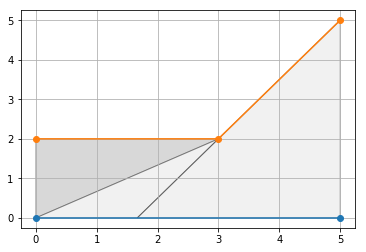

ok 	 The expected value is indeed 2.6

SR2.txt	1.6 0.001
Hello


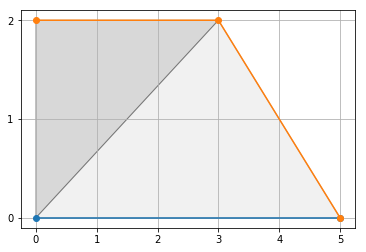

ok 	 The expected value is indeed 1.6

SR3.txt	0.447 0.001
Hello


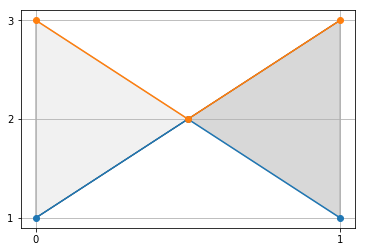

ok 	 The expected value is indeed 0.4472135954999579

SR4.txt	0.83 0.001
Hello


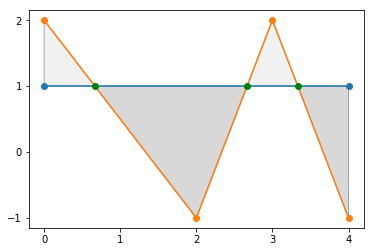

NOT ok 	 The expected value is 0.83, but the output value is 0.8333333333333335.

SR5.txt	1.208 0.01
Hello


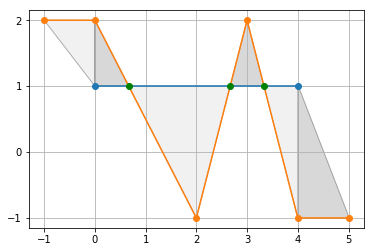

ok 	 The expected value is indeed 1.2083333333333333

SR6.txt	0.6325 0.01
Hello


C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


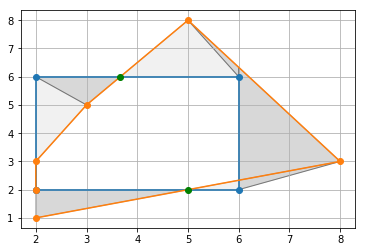

NOT ok 	 The expected value is 0.6325, but the output value is 0.6979166666666665.

[test0]simple.txt	1.8639 1e-05
Hello


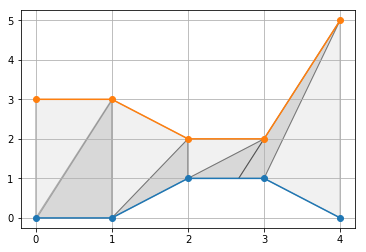

NOT ok 	 The expected value is 1.8639, but the output value is 1.8639610306789278.

[test1]negative.txt	1.0309 1e-05
Hello


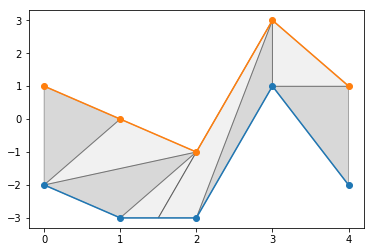

NOT ok 	 The expected value is 1.0309, but the output value is 1.030970684301985.

[test2]simple2.txt	3.9033 1e-05
Hello


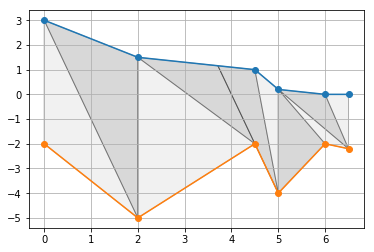

NOT ok 	 The expected value is 3.9033, but the output value is 3.903384142392091.

[test3]intersection.txt	3.5442 1e-05
Hello


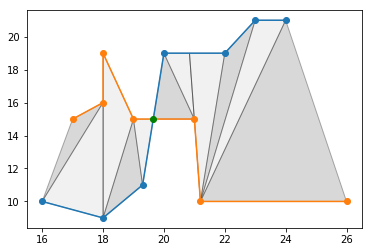

NOT ok 	 The expected value is 3.5442, but the output value is 3.5442607013702894.

[test4]poor_sided.txt	2.8333 1e-05
Hello


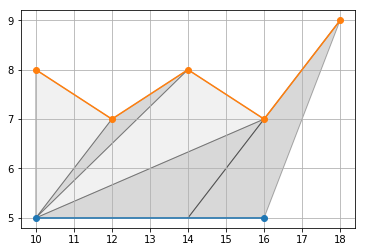

NOT ok 	 The expected value is 2.8333, but the output value is 2.8333333333333335.

[test6].txt	0.8122 1e-05
Hello


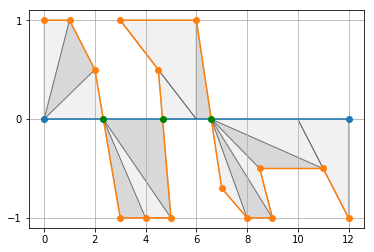

NOT ok 	 The expected value is 0.8122, but the output value is 0.8122140522875817.

[test7].txt	2.0329 1e-05
Hello


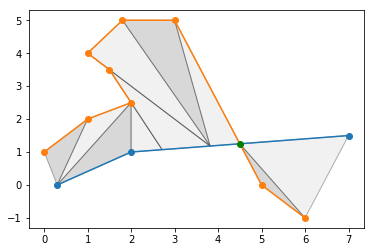

NOT ok 	 The expected value is 2.0329, but the output value is 2.0329426449815213.



False

In [28]:
validator.test(error_btw_trajectories, samples_range = slice(0, None))